<h1>STATS</h1>

<h1>Measure Of Centre</h1>
<p><b>Examine how much data is in centre</b></p>
<ul>
    <li>Mean:Average Value</li>
    <li>Median:Middle Value</li>
    <li>Mode:Most repeating Value</li>
    </ul>
<h2> Key Takeaways:</h2>
<p>Type of data will determine what kind of statu=istics summary be applied on it. Mean is atype of summary statistics<br>
Mean is sensitive to outliers, a data with higher degree of outliers its better to use median.<br>
</p>
<ul>
    <li>Right Skewed: Mean>Median</li>
    <li>Left Skewed: Median>Mean</li>

In [1]:
import numpy as np
import pandas as pd

#data pull
sales_subset_df=pd.read_csv("E:/CAREER_DATA/data_files/sales_subset.csv",index_col=0)
sales_subset_df

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [2]:
#mean
print("Mean of fuel_price_usd_per_l:")
print(sales_subset_df["fuel_price_usd_per_l"].mean())
#median
sorted_sales_df=sales_subset_df.sort_values(["fuel_price_usd_per_l"])
print("Median of fuel_price_usd_per_l:")
print(sorted_sales_df["fuel_price_usd_per_l"].median())

#mode
import statistics
print("Mode of fuel_price_usd_per_l:")
print(statistics.mode(sales_subset_df["fuel_price_usd_per_l"]))#numerical variable
#print(sales_subset_df.info())
print(sales_subset_df["type"].unique())
print("Mode of type:")
print(statistics.mode(sales_subset_df["type"])) #categorical variable

Mean of fuel_price_usd_per_l:
0.7497458438815593
Median of fuel_price_usd_per_l:
0.7433805056783808
Mode of fuel_price_usd_per_l:
0.6794508388787476
['A' 'B']
Mode of type:
A


<h1>Measure of spread</h1>
<p><b>It tells how data points is spread and close to each other</b></p>
<ul>
    <li>Variance: Average of all distances of data points from centre, higher the value the more data is spread</li>
    <li>Standard Deviation: Square root of variance</li>
    <li>Mean absolute deviation: more robust than variance in case of outliers</li>
    <li>OUTLIERS: To calculate the outliers we need to know Quantile and IQR</li> 
    </ul>

In [3]:
#variance
dist_from_centre=sales_subset_df["fuel_price_usd_per_l"]
-np.mean(sales_subset_df["fuel_price_usd_per_l"]) 
sqrd_dist_from_centre=dist_from_centre**2
sum_sqrd_dist_from_centre=np.sum(sqrd_dist_from_centre)
var=sum_sqrd_dist_from_centre/(10773-1)
print(var)

0.5657630129812283


In [4]:
#variance calculate krne aka asaan tareeqah
print(np.var(sales_subset_df["fuel_price_usd_per_l"])) #population variance is calculated
print(np.var(sales_subset_df["fuel_price_usd_per_l"],ddof=1)) #sample variance is calculated

0.003539158800241442
0.0035394873214333327


In [5]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [6]:
#To calculate outliers
from scipy.stats import iqr

fuel_price_usd_per_l=sales_subset_df["fuel_price_usd_per_l"]
iqr=iqr(fuel_price_usd_per_l)
lower_threshold=np.quantile(fuel_price_usd_per_l,0.25)-1.5*iqr
upper_threshold=np.quantile(fuel_price_usd_per_l,0.75)-1.5*iqr
outliers=sales_subset_df[(fuel_price_usd_per_l < lower_threshold)
                         | (fuel_price_usd_per_l >upper_threshold)]
outliers

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


<h1> Random numbers and probability</h1>
<ul>
    <li>sampling without replacement: during sampling when we get repeated data points==dependent sampling</li>
    <li>sampling with replacement:during sampling when we get replaced repeated data points==independent sampling</li>
    </ul>

<h1>Examples</h1>
<ul>
    <li>dependent Sampling: Any data point is affected by the another data point, yaani keh agr sample ke liye 30 data point available hain toh next sampling main 29 hongy, toh ab jab 29 main se sampling hogi woh pichle event se mutaassir hogi</li>
    <li>Independent Sampling: Jab sampled hojany waly data ki kami ko hum khud poora kardein takeh sampling ka process mutaasir nah ho</li>

In [7]:

%who
print(sales_subset_df.columns)
#print(sales_subset_df.info())
#dependent sampling
dep_sampled_data=sales_subset_df["temperature_c"].sample(10) #50 samples nikaalo
ind_sampled_data=sales_subset_df["temperature_c"].sample(10,replace=True) #50 samples nikaalo
print(dep_sampled_data.mean())
print(ind_sampled_data.mean())
#print(sales_subset_df["temperature_c"].mean())
#sales_subset_df["temperature_c"]

dist_from_centre	 fuel_price_usd_per_l	 iqr	 lower_threshold	 np	 outliers	 pd	 sales_subset_df	 sorted_sales_df	 
sqrd_dist_from_centre	 statistics	 sum_sqrd_dist_from_centre	 upper_threshold	 var	 
Index(['store', 'type', 'department', 'date', 'weekly_sales', 'is_holiday',
       'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')
11.299444444444443
19.98388888888889


<h1>What is dependent data?</h1>
<p>Sampled data points jokeh during their pickup munsifanah tareeqe se pick nahi hoye</p>
<p><b>Agr dice ko 1000 baar phenkngah toh har event ke appear hony ke chances barabar raheingy toh ussay jo data aayga woh independent data hoga, mgr agr dice kharab aesse hoi keh 2 ke aany ke chances barh jaein toh woh dependent data hoga</b></p>

<h1>How do we calculate the probability of 2 or more events?</h1>
<p>Jin jin points ki probability maangi hai just add krdein</p>

<h1>Law of large numbers</h1>
<p>Increasing sample size jab actual data jitna banjae<p>

<h1>Distribution</h1>
<p>Discrete Distribution; woh data points jo countable houn, dice ke data points kitne hoty hain? ans:6</p>
<p>Continous Distribution: jab data points countable nahi hoin</p>

In [8]:
#continuous distribution
from scipy.stats import uniform
#wait time is 12 minutes, ab yeh 12 minutes calculate nahi krsakty ho kyun keh beech main seconds hain
#calculate the probablity of wait time less than 7
less_than_7=uniform.cdf(7,0,12) 
#1st argument is number of heads,
#2nd and 3rd argument is range of values to sample,
print(less_than_7)
#calculate probability of more than 7
more_than_7=1-uniform.cdf(7,0,12)
print(more_than_7)
#calculate probability of wait time less than 7 and more than 4
less_7_more_4=uniform.cdf(7,0,12)-uniform.cdf(4,0,12)
print(less_7_more_4)
#calculate the probability of more than 10 mins
more_than_10=1-uniform.cdf(10,0,12)
print(more_than_10)
#calculate the probability of less than 12 and more than 0
above_0_less_12=uniform.cdf(12,0,12)-uniform.cdf(0,0,12)
print(above_0_less_12)
#why 100? kyun keh saarey data point ki probability ko add kara jata ha

0.5833333333333334
0.41666666666666663
0.25000000000000006
0.16666666666666663
1.0


<h1>Outcome</h1>
<ul>
    <li>Probabilities add hoti hain</li>
    <li>countable range of data points are descrete column</li>
    </ul>

<h1>Distribution</h1>
<ul>
    <li>Binomial Distribution: The range of data that has only two outcomes;pass or fail, true or false</li>
    <li>Normal Distribution:</li>
    <li> Distribution:</li>
    <li> Distribution:</li>
    <li> Distribution:</li>
    <li> Distribution:</li>
    <li> Distribution:</li>
    </ul>

[0 1 0 0 1 0 0 1]


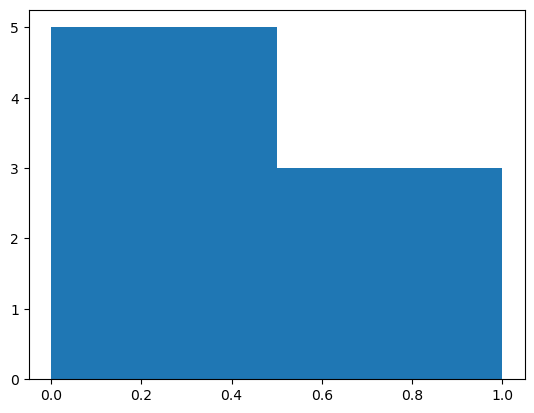

[3 2 1 3 2 3 2 3 1 1]


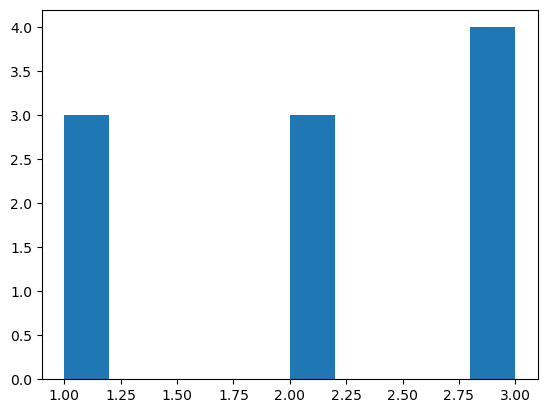

[ 3 11  5  5  7  7  6  6  7  7  7  4]


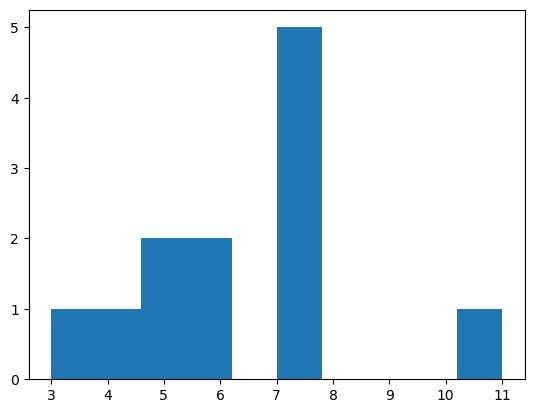

In [9]:
#binomial distribution
#perform 8 flips of a coin, we know the probablity of head is 50%
from scipy.stats import binom
import matplotlib.pyplot as plt
#fig, axes=plt.subplots(3,3, figsize=(10,10)) #creating multiple plots

bin_8flips=binom.rvs(1,0.5,size=8) 
#1st argument is number od heads
#2nd argument is number of heads success rate
#3rd argument is the number of trials
print(bin_8flips)
plt.hist(bin_8flips,bins=2)
plt.show()

#perform 10 flips of 3 coins, we know the probability of head is 50%
bin_10flips=binom.rvs(3,0.5,size=10)
print(bin_10flips)
plt.hist(bin_10flips)
plt.show()
#basically 2 aur 3 isliye dikh raha hai kyun keh 1 baar sampling main
#3 baar coins ko flip kia gaya toh, jab pehla tial khatam hua toh saarey successes add bhi hogaye


#perform 12 flips of 20 coins, with head have the probability is 30%, show binomial distribution
bin_20_flips=binom.rvs(20,0.3,size=12)
print(bin_20_flips)
plt.hist(bin_20_flips)
plt.show()

In [11]:
#now we have binary data and we will calculate probability 

#if i have a coin, it has 2 outcomes 0 or 1, then it is binomial data,
#calculate the probablity of getting 7 head, num of trails=10, probablity of 1 is 50% 
print(binom.pmf(7,10,0.5)) 
#1st argument is number of heads
#2nd argument is number of trials
#3rd argument is head's success rate

#calculate probablity of less than 7
print(binom.cdf(7,10,0.5))
#1st argument is number of heads less than 7
#2nd argument is number of trials
#3rd argument is head's success rate
#probability jumps to 90%
print(binom.cdf(7,10,0.9))

#calculate probablity of more than 7
print(1-binom.cdf(7,10,0.5))
#probability jumps to 90%
print(1-binom.cdf(7,10,0.9))

#how to calculate expected value of probablity of sucess is 90%, trials=10
exp1=0.9*10
print(exp1)
#how to calculate expected value of probablity of sucess is 10%, trials=2
exp2=0.1*2
print(exp2)
#how to calculate expected value of probablity of sucess is 50%, trials=25
exp3=0.5*25
print(exp3)

0.11718749999999999
0.9453125
0.07019082639999996
0.0546875
0.9298091736
9.0
0.2
12.5


<h1>Binomial Distribution</h1>
<p><b>Ap keh paas number of coins/coin hota hai, aapko 1 ya success aany ki probablity batadi jaati hai, aapko un 3 coins ko kitni baar trial krna hai woh bhi bata diya jata hai, <i>ab result main jo array aata hai woh array ka size aapke trials ke barabar hota hai, aur har trial sum krti hai 1 aany ka, kabhi kabhi answer 0 bhi aata hai iska matlb yeh hota hai us sampling ke us specific trial main 1 aik baar bhi nahi aaya hai</i></b></p>
<p>Is tarah aik distribution create hojaati hai samples ki data se</p>

<h1>Normal Distribution</h1>
<h2>How do we know the distribution is normal</h2>
<ul>
    <li>Area of curve=1</li>
    <li>Area is symmetrical</li>
    <li>Probablity around edges hitting 0</li>
    <li>Mean is 0 and std=1</li>
    <li>Area falls:</li>
    <ul>
        <li>68% area falls under 1 std</li>
        <li>95% area falls under 2 std</li>
        <li>99.7% area falls under 3 std</li>
    </ul>
    </ul>

0.15865525393145707
0.8413447460685429
0.1251993291672192
4.472818349725182e-116
3.23888778178324e-117
[155.28176218 167.73303295 163.80396273 157.0802765  164.31754093
 161.74432866 164.26399998 163.89486181 161.62097513 169.76874021]


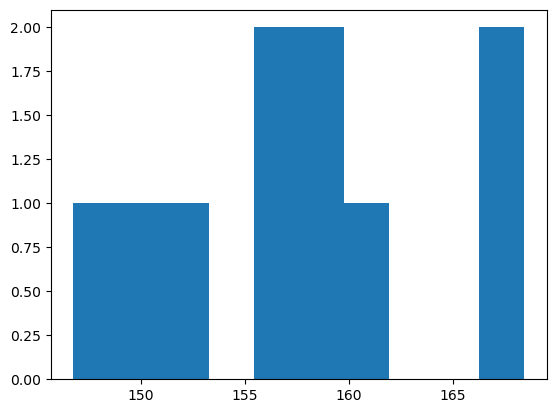

In [18]:
#In a normal distribution if you want to know the probablility of specific range
from scipy.stats import norm
p154_less=norm.cdf(154,161,7)
#1st argument is the range of area from 0-154
#2nd argument is mean of distribution
#3rd argument is std
print(p154_less)

#find probability more than 154
p154_more=1-norm.cdf(154,161,7)
print(p154_more)

#find p of less than 157 and more than 154
p_range_157_to_154=norm.cdf(157,161,7)-norm.cdf(154,161,7)
print(p_range_157_to_154)

#to figure out what 90% of normally distributed data is saying
print(norm.cdf(0.9,161,7))
#to figure out what 10% of normally distributed data is saying
print(norm.cdf(0.1,161,7))

#to generate random numbers from normally distributed data
print(norm.rvs(161,7,size=10))
#1st argument is mean
#2nd argument is std
#3rd argument is number of trials
plt.hist(norm.rvs(161,7,size=10)) #visualize distribution
plt.show()

<h1> CENTRAL LIMIT THEORUM </h1>
<p>When samples are taken out randomly independent process, the increasing number of trials making sample close to a normal distribution
IT IS USEFUL AND SAVES TIME AND YOU BASICALLY GENERATE CLOSE DATA, RATHER THAN COLLECTING IT
</p>

In [20]:
#HOW TO REPEAT SAMPLING PROCESS

<h1>Poisson Distribution</h1>
<p>Reoccurance of events at a specified interval of time
Examples: 5 animals adopted per week, 12 people dying every year in mount everest.
    lemda=average no of events per time interval
    distribution peak==mean==most repeated
</p>

0.09160366159257921
0.19123606207962532
0.8087639379203747
[ 4 10  8  9 11  6 10  6  9  7]


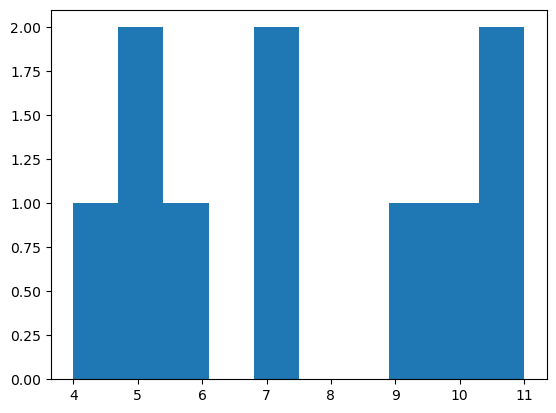

[20 31 20 26 35 21 19 25 31 24]


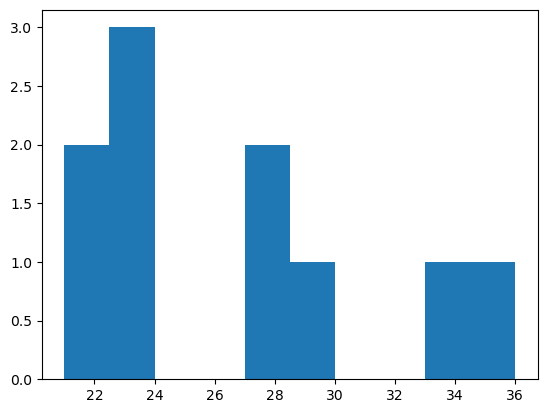

In [27]:
#IF LEMBA=8, then what is the probablity of 5 adaption in same interval
from scipy.stats import poisson
print(poisson.pmf(5,8))
#1st argument is req average
#2nd argument is a given average
#to get probability of 5 or fewer adaptions
print(poisson.cdf(5,8))
#to get probability of 5 or more adaptions
print(1-poisson.cdf(5,8))
#take out samples from poisson distribution
print(poisson.rvs(8,size=10))
#1st argument is mean
#2nd argument is hw many times we sample
plt.hist(poisson.rvs(8,size=10))
plt.show()

print(poisson.rvs(26,size=10))
plt.hist(poisson.rvs(26,size=10))
plt.show()

<h1>Exponenetial Distribution</h1>
<p>The probability of finding interval of poisson events(repeating events)</p>

In [32]:
#if 8 average adaption happening in a week,
#what is the probability of 2 weeks or less of same 8 adaptions
from scipy.stats import expon
print(expon.cdf(2,scale=8))
#22% chance is 8 adap/week happen

#what is p animal adaption less than 5 weeks on same 8 adap/week
print(1-expon.cdf(5,scale=8))
#53% chance is 8adap/week

#what is the p between 1 and 3, 8adap/week
print(expon.cdf(3,scale=8)-expon.cdf(1,scale=8))
#19% chance is 8adap/week 

0.22119921692859515
0.5352614285189903
0.19520762379362322


<h1>t-Distribution</h1>
<p>When compared with normal distribution, more values are speaded, tails are thick, likely to be away from mean.</p>
<h1>Log-Normal Distribution</h1>
<p>A data that follow lograthimitic scale; ault blood pressure</p>

<h1>Correlation</h1>
<p>Aik event ke hony se doosra event ho, 
    +1 is very stong, 0 is weak and -1 is negative correlation
Norelationship mean x doesn't correlated with y means x doesn't tell anythin about y</p>

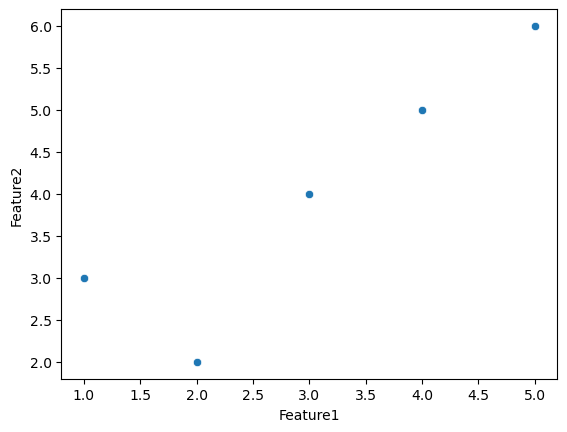

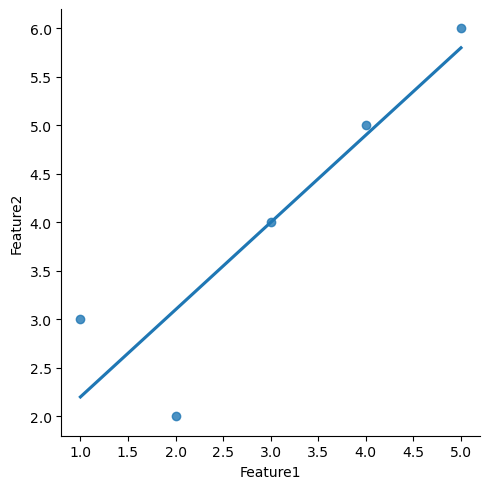

In [38]:
#visualize correlation
import seaborn as sns

data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [3, 2, 4, 5, 6],
    'Feature3': [5, 6, 7, 8, 9],
    'Feature4': [8, 9, 10, 11, 12],
}

df = pd.DataFrame(data)
sns.scatterplot(x="Feature1",y="Feature2",data=df)
plt.show()
#to add linear trend
sns.lmplot(x="Feature1",y="Feature2",data=df,ci=None)
plt.show()

In [40]:
#to know correlation between columns
print(df["Feature1"].corr(df["Feature2"]))

0.8999999999999998


<h1>Correlation Caveats</h1>
<p><b>There are many ways to calculate correlation, we used Pearson Product Correlation</b><br><br>
    In case of parabolically related data! correlation coefficient measures the strength of linear relationship</p>
    

<h1>Tips</h1>
<p>Correlation should not be used blindly it must be visualize first the use</p>
<ul>
    <li>When data is highy skewed apply log transformation</li></ul>
    <p>Other transformation required to find correlation</p>
    <ul>
    <li>log transformation;log(x)</li>
    <li>sqrt transformation;sqrt(x)</li>
    <li>reciprocal transformation;1/x</li>
    <li>log and log transformation;log(x) and log(x)</li>
    <li>sqrt and reciprocal transformation; sqrt(x) (1/x)</li>
    <li> transformation</li>
    </ul>
</p>        
 <p><i>"Correlation does not imply causation"</i></p>

<h1>Confounfing</h1>
<p>Ex: Coffee drinking-association>Smoking, and Lung Cancer-causation>Smoking</p>
<h1>Controlled Experiment</h1>
<p>Group A recieves treatment, group B doesn't recieve it, Ex;A/B Testing.<br>
Treatments group: sees an advertisement<br>
control group: not seen an advertisement. In this testing groups should be cmparable, pata chala aap 25 saala ur 50 saal ke groups bana kr testing karrae houn, issey biasness aajatai hai results main, in this case age is potential confunder</p>
<h1>Tips to eliminate confounding</h1>
<ul>
    <li>Randomizing controlled trial participant assigned to treatment/control randomly</li>
    <li>Placebo: Participant don't in which group they are in</li>
    <li>Double Blind Trial: Person who is controlling the group doesnt know whether treatment is real or placebo</li>
    </ul>
<h1>Observational Study</h1>
<p>Participants are not forces to specific group</p>
<h1>Longitudinal Study V Cross sectional study</h1>
<p>Longitudinal: Data Record is of longer periods(30 years)<br>
    Cross Sectional: Data stored in chunks, less expensive</p>
    